# Linear regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Notice to install tensorflow.python
from tensorflow.python.keras.layers import Dense, Input
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.python.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

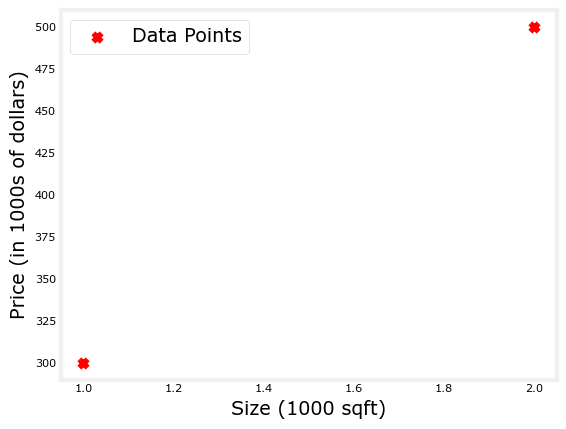

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [17]:
# Create a Linear layer before training
linear_layer = Dense(units=1, activation='linear')


linear_layer.get_weights()

[]

In [19]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

# w is initiallized randomly
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

tf.Tensor([[-0.65]], shape=(1, 1), dtype=float32)
w = [[-0.65]], b=[0.]


In [20]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays 
# w = 200 and b = 100 is the result
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [23]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

alin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [25]:
prediction_tf = linear_layer(X_train)
print(prediction_tf)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)


# Sigmoid activation

In [27]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

print(X_train)
print(Y_train)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [30]:
model = Sequential([
    Dense(1, input_dim = 1, activation='sigmoid', name = 'L1')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [35]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, b)

[[-0.65]] [0.]


In [39]:
# This one is not yet trained! Just experiment how the neural network
# delivers the prediction

a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

[[0.5]]


In [36]:
X_train[0]

array([0.], dtype=float32)

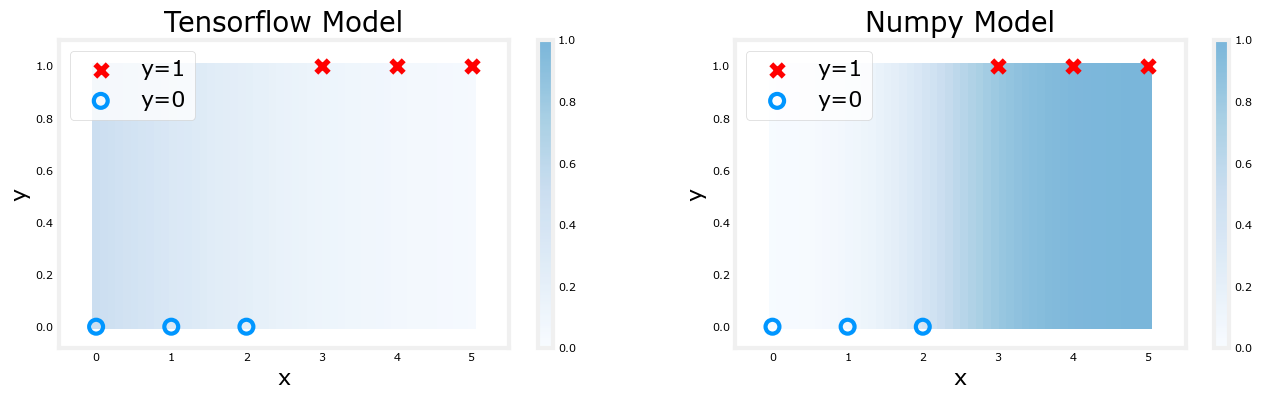

In [43]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]
set_w = np.array([[2]])
set_b = np.array([-4.5])

plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)